In [0]:
import nltk
nltk.download('stopwords')
#from nltk.corpus import stopwords
import constant
en_stops = constant.stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
X_train = open('X_train.txt')
line = X_train.readline()
train = list()
while line:
    line = line.strip('\n')
    line = line.lower()
    line = line.split()
#     print(line)
    temp_line = list()
    for word in line: 
        if word not in en_stops:
            temp_line.append(word)
    train.append(temp_line)
#     print(temp_line)
    line = X_train.readline()
print(type(train))
print(len(train))
print(type(train[0]))

<class 'list'>
341072
<class 'list'>


In [0]:
from keras.layers.core import Activation, Dense
from keras.preprocessing.text import Tokenizer
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing import sequence
import nltk 
import collections
import numpy as np

Using TensorFlow backend.


In [0]:
y_train = open('y_train.txt')
label = list()
line = y_train.readline()
while line:
    line = line.strip('\n')
    line = line.split()
    label.append(int(line[0]))
    line = y_train.readline()
print(len(label))

341072


In [0]:
X_valid = open('X_valid.txt')
line = X_valid.readline()
valid_data = list()
while line:
    line = line.strip('\n')
    line = line.lower()
    line = line.split()
#     print(line)
    temp_line = list()
    for word in line: 
        if word not in en_stops:
            temp_line.append(word)
    valid_data.append(temp_line)
#     print(temp_line)
    line = X_valid.readline()
print(type(valid_data))
print(len(valid_data))
print(type(valid_data[0]))

<class 'list'>
113691
<class 'list'>


In [0]:
y_valid = open('y_valid.txt')
valid_label = list()
line = y_valid.readline()
while line:
    line = line.strip('\n')
    line = line.split()
    valid_label.append(int(line[0]))
    line = y_valid.readline()
print(len(valid_label))

113691


In [0]:
import numpy as np
label = np.array(label)
train = np.array(train)
valid_data = np.array(valid_data)
valid_label = np.array(valid_label)

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train)
tokenizer.fit_on_texts(valid_data)

In [0]:
vocab=tokenizer.word_index

In [0]:
len(vocab)

448301

In [0]:
encoded_train = tokenizer.texts_to_sequences(train)
encoded_valid = tokenizer.texts_to_sequences(valid_data)

In [0]:
type(encoded_valid)

list

In [0]:
encoded_train = np.array(encoded_train)
encoded_valid = np.array(encoded_valid)

In [0]:
temp_len = 0
for i in range(len(encoded_train)):
   temp_len += len(encoded_train[i])

mean_len = temp_len / len(encoded_train)
mean_len = int(mean_len)

encoded_train = sequence.pad_sequences(encoded_train, maxlen=mean_len)

In [0]:
mean_len

20

In [0]:
encoded_valid = sequence.pad_sequences(encoded_valid, maxlen=mean_len)

In [0]:
label = label.reshape(-1,1)
valid_label = valid_label.reshape(-1,1)

In [0]:
valid_label.shape

(113691, 1)

In [0]:
import keras
label_train = keras.utils.to_categorical(label)
valid_label = keras.utils.to_categorical(valid_label)

In [0]:
len(vocab)

448301

In [0]:
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPool2D
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras import layers
from keras.optimizers import Adam
from keras.models import Model,Sequential
import keras
embedding_dim = 128
model = Sequential()
model.add(layers.Embedding(len(vocab)+1, embedding_dim,input_length=20))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(Dense(6,activation='softmax'))
print(model.summary())




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 128)           57382656  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 128)           82048     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 774       
Total params: 57,465,478
Trainable params: 57,465,478
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
from keras.callbacks import ModelCheckpoint

filepath = "best_weights.h5"
 
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max', period=1)
callbacks_list = [checkpoint]

adam = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(encoded_train, label_train,epochs=15,verbose=1,validation_data = (encoded_valid,valid_label),batch_size=500,callbacks = callbacks_list)

ValueError: ignored

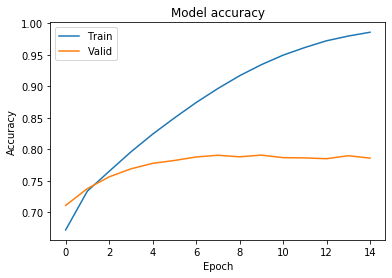

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

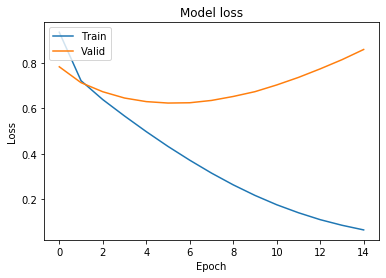

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [0]:
X_test = open('X_test.txt')
line = X_test.readline()
test = list()
while line:
    line = line.strip('\n')
    line = line.lower()
    line = line.split()
    temp_line = list()
    for word in line: 
        if word not in en_stops:
            temp_line.append(word)
    test.append(temp_line)
    line = X_test.readline()
print(type(test))
print(len(test))
print(type(test[0]))

<class 'list'>
113691
<class 'list'>


In [0]:
y_test = open('y_test.txt')
label_test = list()
line = y_test.readline()
while line:
    line = line.strip('\n')
    line = line.split()
    label_test.append(int(line[0]))
    line = y_test.readline()

In [0]:
encoded_test = tokenizer.texts_to_sequences(test)
encoded_test = np.array(encoded_test)
encoded_test = sequence.pad_sequences(encoded_test, maxlen=mean_len)

In [0]:
from keras.models import load_model

model = load_model('best_weights.h5')

predict_test = model.predict(encoded_test)

In [0]:
acc_num = 0
for i in range(len(encoded_test)):
    cla = np.argmax(predict_test[i])
    if cla == label_test[i]:
        acc_num = acc_num + 1

print(acc_num/len(encoded_test))

0.7946539303902683
